<a href="https://colab.research.google.com/github/Krutika-bhandekar/Exploratory-Data-Analysis---Global-Terrorism-/blob/main/mGlobal_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline
import math
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/eda/Global Terrorism Database/Global Terrorism Data (1).csv"

In [ ]:
data = pd.read_csv(path, encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Data Understanding**

Basic Checks

In [ ]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.shape

(181691, 135)

In [ ]:
list(data.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


**Findding the Percentage of Missing Values Column wise**

In [ ]:
missingvalues_percentage = data.isna().sum().sort_values(ascending= False)/len(data) #To get the percentage of null values each column wise
missingvalues_percentage

gsubname3           0.999890
weapsubtype4_txt    0.999615
weapsubtype4        0.999615
weaptype4           0.999598
weaptype4_txt       0.999598
                      ...   
suicide             0.000000
success             0.000000
crit3               0.000000
property            0.000000
eventid             0.000000
Length: 135, dtype: float64

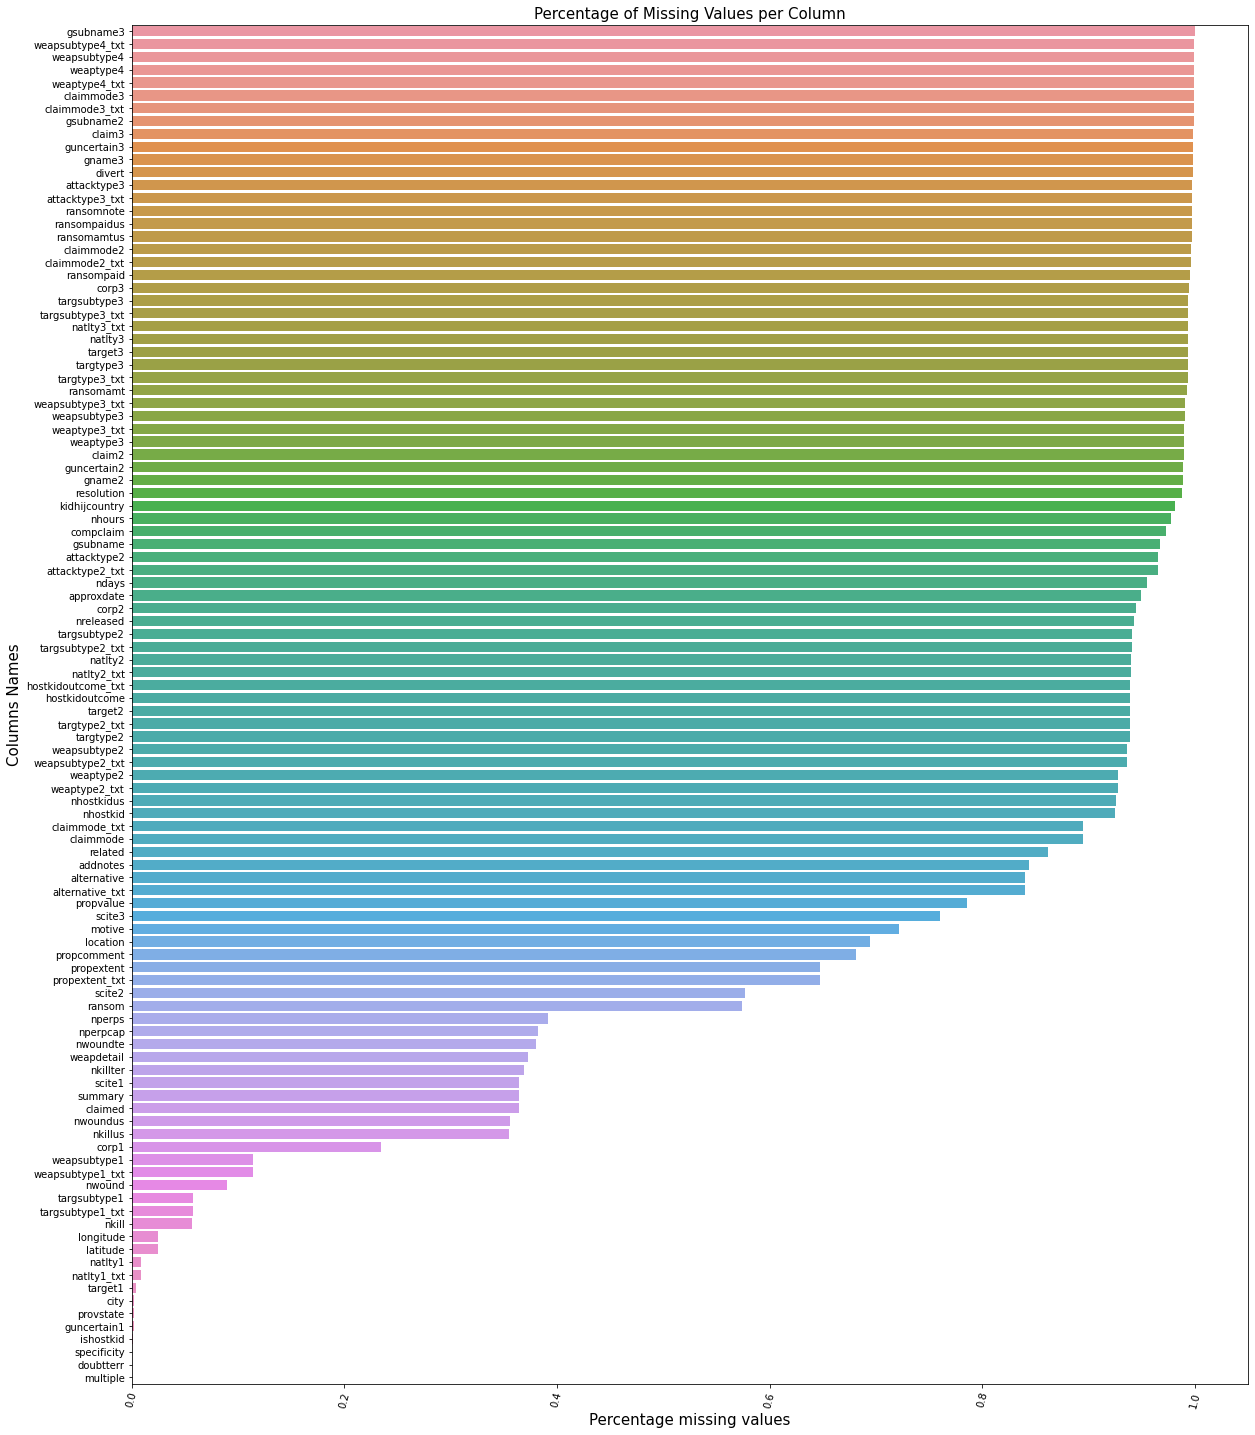

In [ ]:
# Plotting graph for finding columnwise missing values
plt.figure(figsize=(20,25))
plt.xticks(rotation=75)
plt.yticks(fontsize=10)
plt.title("Percentage of Missing Values per Column",fontsize=15)

b=sns.barplot(x=missingvalues_percentage[missingvalues_percentage>0.0],y=missingvalues_percentage[missingvalues_percentage>0.0].index)
b.set_ylabel("Columns Names",fontsize= 15)
b.set_xlabel("Percentage missing values",fontsize= 15)
plt.show()

**Data Cleaning**

In [ ]:
# Finding the columns that have more than 15% missing values
drop_columns_list = list(missingvalues_percentage[missingvalues_percentage>0.15].index.values)

In [ ]:
# Dropping the Missing value columns from the data set
data.drop(drop_columns_list,inplace=True,axis=1)

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
data.shape

(181691, 47)

In [ ]:
# Exploring the remaining columns data for missing values
missingvalues_percentage = data.isna().sum().sort_values(ascending= False)/len(data) #To get the percentage of null values each column wise
missingvalues_percentage

weapsubtype1        0.114304
weapsubtype1_txt    0.114304
nwound              0.089773
targsubtype1_txt    0.057091
targsubtype1        0.057091
nkill               0.056761
longitude           0.025081
latitude            0.025076
natlty1             0.008581
natlty1_txt         0.008581
target1             0.003500
city                0.002389
provstate           0.002317
guncertain1         0.002091
ishostkid           0.000980
specificity         0.000033
doubtterr           0.000006
multiple            0.000006
individual          0.000000
INT_MISC            0.000000
gname               0.000000
weaptype1_txt       0.000000
weaptype1           0.000000
property            0.000000
INT_IDEO            0.000000
INT_LOG             0.000000
dbsource            0.000000
eventid             0.000000
attacktype1_txt     0.000000
targtype1_txt       0.000000
targtype1           0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country       

<Figure size 432x360 with 0 Axes>

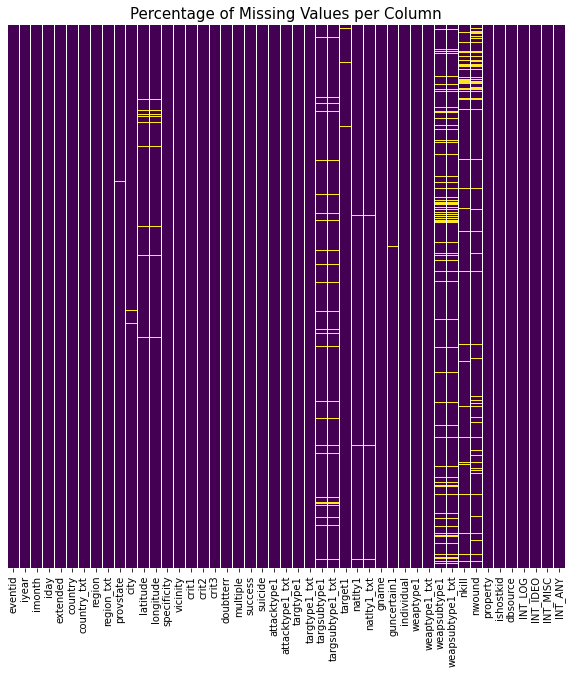

In [ ]:
# plt.figure(figsize=(25,20))
# plt.xticks(rotation=75)
# plt.yticks(fontsize=15)
# plt.title("Percentage of Missing Values per Column",fontsize=15)

# b=sns.barplot(x=missingvalues_percentage,y=missingvalues_percentage.index)
# b.set_ylabel("Columns Names",fontsize= 15)
# b.set_xlabel("Percentage missing values",fontsize= 15)
# plt.show()

plt.figure(figsize=(6,5))
plt.figure(figsize=(10,10))
plt.title("Percentage of Missing Values per Column",fontsize=15)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

We will analyse following set of columns for our analysis:

*   Year, Month, Country, Region, State, City, 
*   ishostkid, Successs, Nationality of victim
*   Attack type, Target type, Weapon type, 
*   nkills, nwound, Gang name

In [ ]:
data.drop(columns={'eventid','extended','iday','country','targsubtype1','region','weaptype1','weapsubtype1','specificity','vicinity','crit1','crit2','crit3','doubtterr','multiple','suicide',
                  'attacktype1','targtype1','targsubtype1_txt','target1','natlty1_txt','guncertain1','individual','weapsubtype1_txt','property','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'
                  },inplace=True,axis=1)

In [ ]:
data.shape

(181691, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   country_txt      181691 non-null  object 
 3   region_txt       181691 non-null  object 
 4   provstate        181270 non-null  object 
 5   city             181257 non-null  object 
 6   latitude         177135 non-null  float64
 7   longitude        177134 non-null  float64
 8   success          181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  natlty1          180132 non-null  float64
 12  gname            181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
 16  ishostkid        181513 non-null  floa

In [ ]:
data.head()

,iyear,imonth,country_txt,region_txt,provstate,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,natlty1,gname,weaptype1_txt,nkill,nwound,ishostkid
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,NaN,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,NaN,NaN,0.0


In [ ]:
data.columns

Index(['iyear', 'imonth', 'country_txt', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt',
       'natlty1', 'gname', 'weaptype1_txt', 'nkill', 'nwound', 'ishostkid'],
      dtype='object')

# **Data Manipulation & Handling Missing Values :** 

In [ ]:
data=data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','success':'Success','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_Type','nkill':'Kills','nwound':'Wounds'})

In [ ]:
data.columns

Index(['Year', 'Month', 'Country', 'Region', 'State', 'City', 'latitude',
       'longitude', 'Success', 'Attack_type', 'Target_type', 'natlty1',
       'Gang_name', 'Weapon_Type', 'Kills', 'Wounds', 'ishostkid'],
      dtype='object')

In [ ]:
data['State']= data['State'].fillna('Unkown')
data['City']=data['City'].fillna('Unkown')
data['Target_type']= data['Target_type'].fillna("Others")
data['Kills']=data['Kills'].fillna(0)
data['Wounds']=data['Wounds'].fillna(0)
data['victims']=data['Kills']+data['Wounds']

In [ ]:
# Finding column wise unique values
data[['Country','Region','Target_type','Attack_type','Gang_name','Weapon_Type']].nunique()

Country         205
Region           12
Target_type      22
Attack_type       9
Gang_name      3537
Weapon_Type      12
dtype: int64

In [ ]:
data.head()

,Year,Month,Country,Region,State,City,latitude,longitude,Success,Attack_type,Target_type,natlty1,Gang_name,Weapon_Type,Kills,Wounds,ishostkid,victims
0,1970,7,Dominican Republic,Central America & Caribbean,Unkown,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,58.0,MANO-D,Unknown,1.0,0.0,0.0,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),21.0,23rd of September Communist League,Unknown,0.0,0.0,1.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,217.0,Unknown,Unknown,1.0,0.0,0.0,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),217.0,Unknown,Explosives,0.0,0.0,0.0,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),217.0,Unknown,Incendiary,0.0,0.0,0.0,0.0


# **I. Univariate Analysis**

## **1. Analysis of Global Terror Attacks**

### **1.1. Analysis of Terror attacks year wise**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


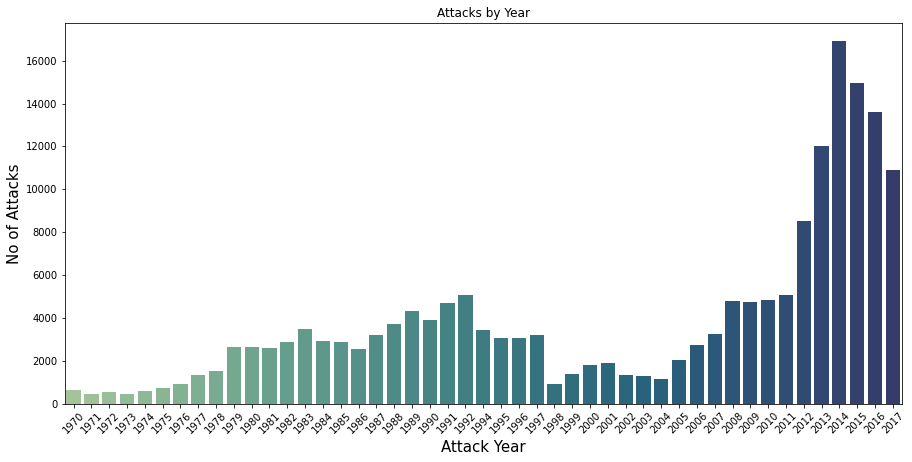

In [ ]:
# No of Attacks Vs Year - Analysis graph
plt.figure(figsize=(15,7));
ax= data['Year'].unique()
ay = data['Year'].value_counts(dropna=False).sort_index()
sns.barplot(ax,ay,palette= 'crest')
plt.xticks(rotation=45)
plt.ylabel('No of Attacks',fontsize= 15)
plt.xlabel("Attack Year",fontsize= 15)
plt.title("Attacks by Year")
plt.show()

**Observations :**

1.  Terror attacks were rapidly increasing from the year 2004 to 2014.
2.  Last 3 years terror attacks were in decreasing trend.

### **1.2. Analysis of Terror attacks in the Year 2014**

In [ ]:
# Selecting the year 2014 from Global terrorism data set for brief study
data_2014 = data[data.Year==2014]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


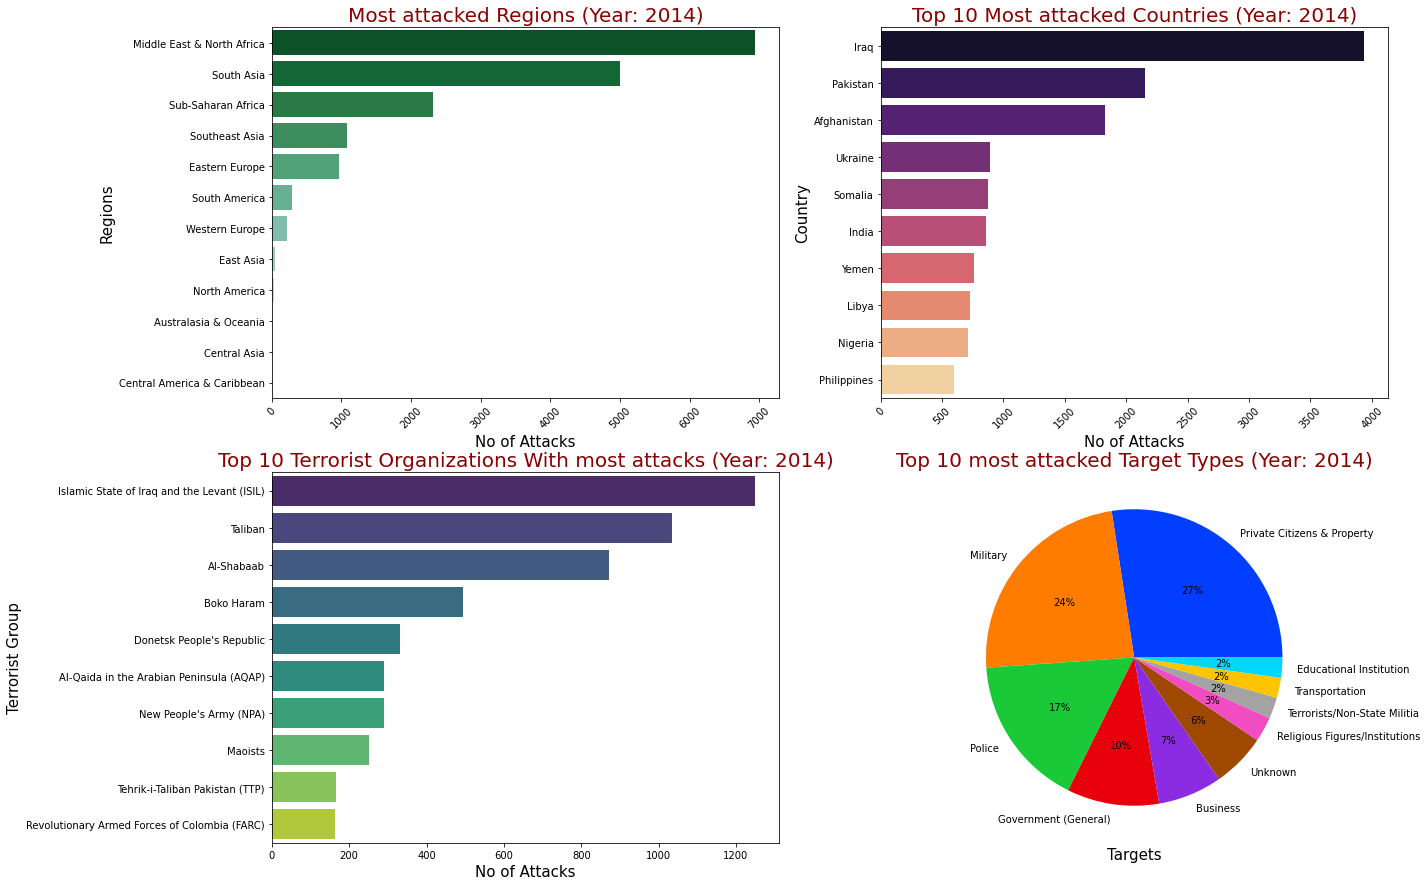

In [ ]:
# Regions that were attacked most (Year: 2014)
plt.subplot(2,2,1)
sns.barplot(data_2014['Region'].value_counts().values,data_2014['Region'].value_counts().index,palette='BuGn_r')
plt.title("Most attacked Regions (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Regions',fontsize=15)
plt.xlabel('No of Attacks',fontsize=15)
plt.xticks(rotation=45)

# Top 10 countries that were attacked (Year: 2014)
plt.subplot(2,2,2)
sns.barplot(data_2014['Country'].value_counts().head(10).values,data_2014['Country'].value_counts().head(10).index,palette='magma')
plt.title("Top 10 Most attacked Countries (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Country',fontsize=15)
plt.xlabel('No of Attacks',fontsize=15)
plt.xticks(rotation=45)

# Top 10 Terrorist Gangs involved in Terror attacks (Year: 2014)
plt.subplot(2,2,3)
sns.barplot(data_2014['Gang_name'].value_counts()[1:11].values,data_2014['Gang_name'].value_counts()[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations With most attacks (Year: 2014)",fontsize=20,color='darkred')
plt.ylabel('Terrorist Group',fontsize= 15)
plt.xlabel("No of Attacks",fontsize= 15)

# Top 10 most attacked Target types (Year: 2014)
plt.subplot(2,2,4)
palette_color = sns.color_palette('bright')
xlabels = data_2014['Target_type'].value_counts().head(10).index
ylabels= data_2014['Target_type'].value_counts().head(10).values 
plt.pie(ylabels,labels=xlabels,colors=palette_color, autopct='%.0f%%')
plt.title("Top 10 most attacked Target Types (Year: 2014)",fontsize=20,color='Darkred')
plt.xlabel("Targets",fontsize=15)

plt.gcf().set_size_inches(20,15)

**Observations :**
1. In 2014, The most attacked region is 'Middle East & North Africa' then followed by South Asia
2. In 2014, The most attacked Country is 'Iraq' followed by 'Pakistan' and 'Afghanistan'
3. In 2014, 'ISIL' is the Terrorist Organization with most attacks in the world.
4. In 2014, 'Private Citizens & Property' ,'Military' and 'Police' are the 3 main targets in terror attacks

In [ ]:
data_till_2014 = data[data.Year <= 2014]
data_after_2014 = data[data.Year > 2014]

In [ ]:
data_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11]

Islamic State of Iraq and the Levant (ISIL)    3990
Taliban                                        3208
Al-Shabaab                                     1531
Boko Haram                                     1113
Houthi extremists (Ansar Allah)                 892
Kurdistan Workers' Party (PKK)                  855
New People's Army (NPA)                         852
Maoists                                         747
Sinai Province of the Islamic State             426
Palestinian Extremists                          370
Name: Gang_name, dtype: int64

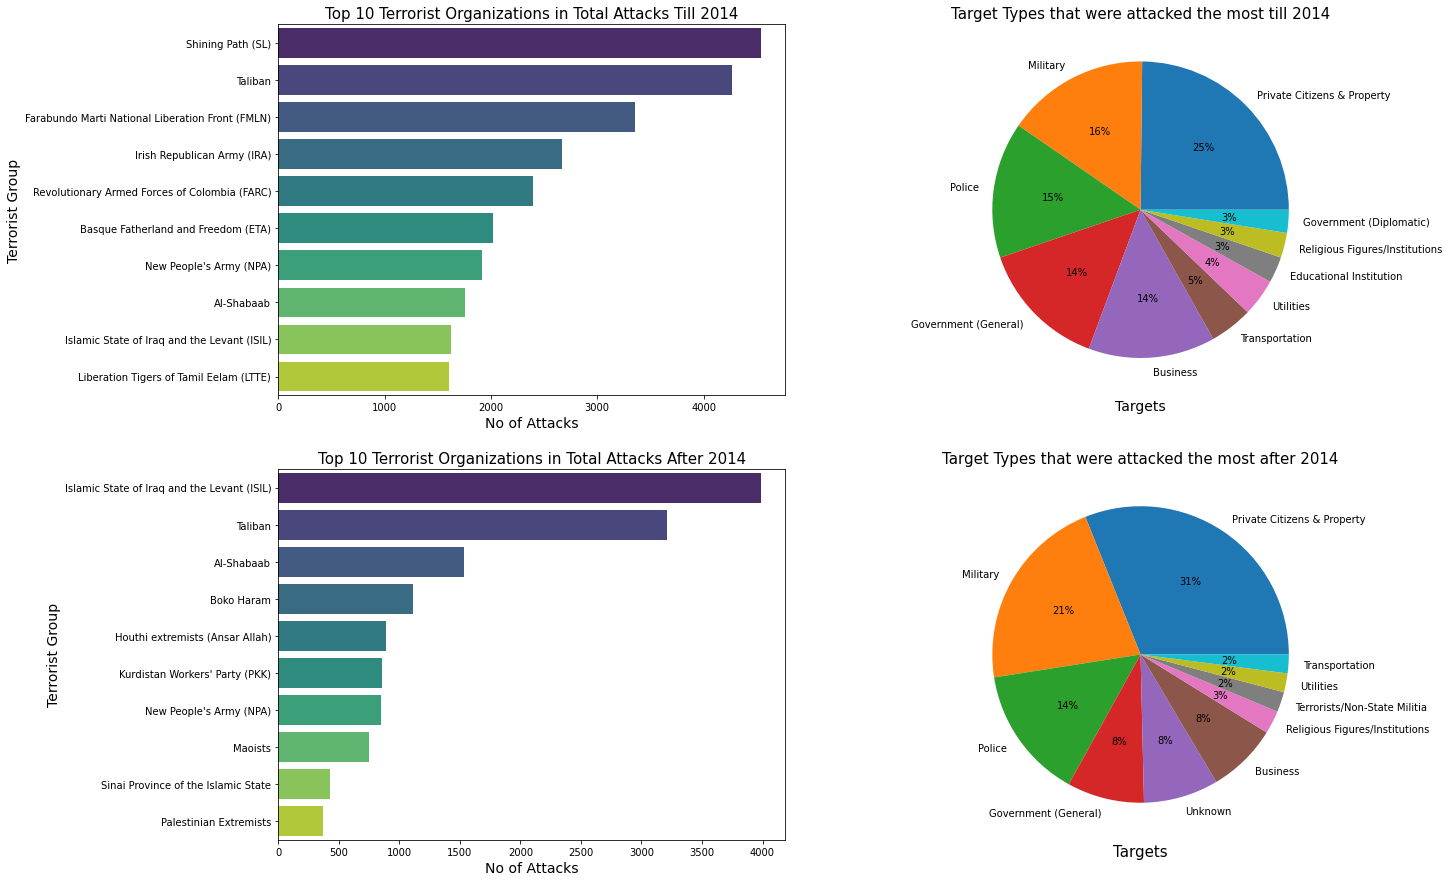

In [ ]:
# Top 10 Terrorist Organizations in total attacks till 2014

plt.subplot(2,2,1)

sns.barplot(x = data_till_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11] , y = data_till_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations in Total Attacks Till 2014",fontsize = 15)
plt.ylabel('Terrorist Group',fontsize= 14)
plt.xlabel("No of Attacks",fontsize= 14)

# Target Types that were attacked the most till 2014

plt.subplot(2,2,2)
plt.pie(data_till_2014['Target_type'].value_counts().head(10).values , labels=data_till_2014['Target_type'].value_counts().head(10).index , autopct='%.0f%%')
plt.title("Target Types that were attacked the most till 2014",fontsize = 15)
plt.xlabel("Targets",fontsize = 14)

# Top 10 Terrorist Organizations in total attacks after 2014
plt.subplot(2,2,3)
sns.barplot(x = data_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11] , y = data_after_2014["Gang_name"].value_counts().sort_values(ascending = False)[1:11].index, palette='viridis')
plt.title("Top 10 Terrorist Organizations in Total Attacks After 2014",fontsize = 15)
plt.ylabel('Terrorist Group',fontsize= 14)
plt.xlabel("No of Attacks",fontsize= 14)

# Target Types that were attacked the most after 2014
plt.subplot(2,2,4)
plt.pie(data_after_2014['Target_type'].value_counts().head(10).values , labels=data_after_2014['Target_type'].value_counts().head(10).index , autopct='%.0f%%')
plt.title("Target Types that were attacked the most after 2014",fontsize = 15)
plt.xlabel("Targets",fontsize=15)

plt.gcf().set_size_inches(20,15)


###**1.3 Analysis of Most Target types World wide**

In [ ]:
# Total Target Types in Terror Attacks world wide
data['Target_type'].value_counts().sort_values(ascending= False)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

In [ ]:
# Percentage of Target type in overall targets
(data['Target_type'].value_counts().head(10)/data.shape[0])*100

Private Citizens & Property       23.947801
Military                          15.401974
Police                            13.487735
Government (General)              11.713844
Business                          11.375907
Transportation                     3.742068
Utilities                          3.314969
Unknown                            3.246171
Religious Figures/Institutions     2.443709
Educational Institution            2.378764
Name: Target_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


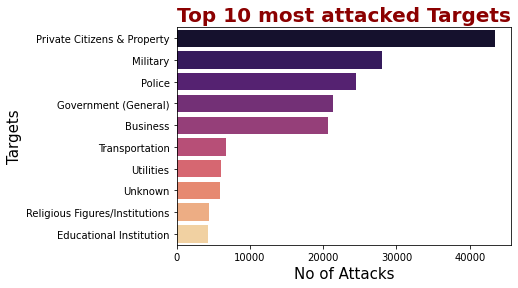

In [ ]:
# Plotting Top 10 Target Type Vs No of Attacks world wide
sns.barplot(data['Target_type'].value_counts().head(10).values,data['Target_type'].value_counts().head(10).index,palette ='magma')
plt.title("Top 10 most attacked Targets",fontsize=20,color='Darkred',fontweight="bold")
plt.ylabel("Targets",fontsize=15)
plt.xlabel("No of Attacks",fontsize=15)
plt.show()

**Observations :**
1. The most attacked target is 'Private Citizens & Property' which is approximately 25%
2. Military, Police, Government and Business are of 10-20% attacked Targets

###**1.4 Analysis of Most Attack types World wide**

In [ ]:
# Total Attack types in the Terror attacks world wide
data['Attack_type'].value_counts().sort_values(ascending=False)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_type, dtype: int64

In [ ]:
# Percentage of Attack type in overall Attacks
round((data['Attack_type'].value_counts()/data.shape[0])*100,2)

Bombing/Explosion                      48.57
Armed Assault                          23.48
Assassination                          10.63
Hostage Taking (Kidnapping)             6.14
Facility/Infrastructure Attack          5.70
Unknown                                 4.00
Unarmed Assault                         0.56
Hostage Taking (Barricade Incident)     0.55
Hijacking                               0.36
Name: Attack_type, dtype: float64

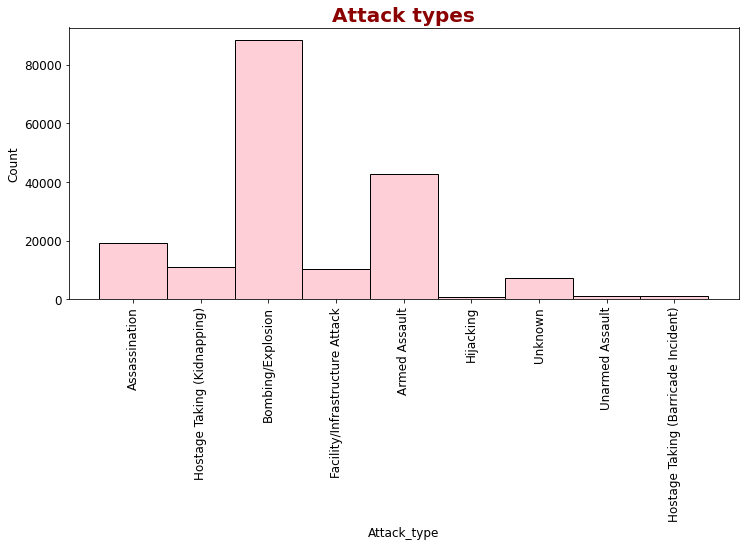

In [ ]:
# Plotting Top 10 Attack Type Vs No of Attacks world wide
plt.figure(figsize=(12,5));
plt.rcParams.update({'font.size':12});
plt.xticks(rotation = 90)
plt.title('Attack types',fontsize=20,color='Darkred',fontweight="bold")
sns.histplot(data['Attack_type'],palette='rocket',color='Pink')

**Observations:**
1. 50% of the Attacks happened with Bombing/Explosions
2. 10-20% of the Attcks happened with Armed assault and Assassination. Rest are in between 0-6%

###**1.5 Analysis of Most used Weapon types in Terror attacks**

In [ ]:
# Total Weapon types used in the Terror attacks world wide
data['Weapon_Type'].value_counts().sort_values(ascending=False)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [ ]:
# Percentage of Weapon type used in overall Attacks
round((data['Weapon_Type'].value_counts()/data.shape[0])*100,2)[:6]

Explosives    50.87
Firearms      32.21
Unknown        8.34
Incendiary     6.13
Melee          2.01
Chemical       0.18
Name: Weapon_Type, dtype: float64

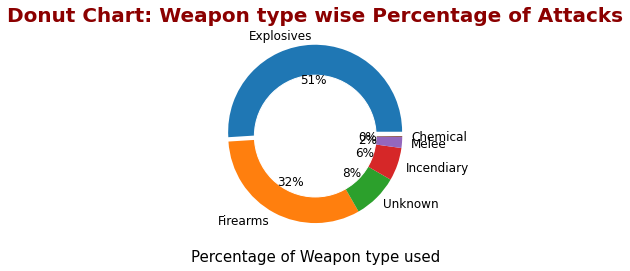

In [ ]:
# Donut chart indicating the percentage of Weapon types used for attacks
explode = (0.05,0,0,0,0,0)
plt.pie(round((data['Weapon_Type'].value_counts()/data.shape[0])*100,2)[:6],explode=explode,labels=round((data['Weapon_Type'].value_counts()/data.shape[0])*100,2)[:6].index,
        autopct='%.0f%%')
my_circle = plt.Circle((0,0),0.7,color='white')
plt.title("Donut Chart: Weapon type wise Percentage of Attacks",color="Darkred",fontsize=20,fontweight="bold")
plt.xlabel("Percentage of Weapon type used",fontsize=15)
p=plt.gcf().gca().add_artist(my_circle)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

**Observations:**
1. Explosives were used for more than 50% of the Attacks.
2. 6-30% of the Attacks happened with Firearms and Incendiary. Rest are in between 0-2%